## Trying out the sketch library

https://colab.research.google.com/gist/bluecoconut/410a979d94613ea2aaf29987cf0233bc/sketch-demo.ipynb

In [66]:
import pandas as pd
import matplotlib

In [67]:
POLLUTION_DATA_FILE = "../data/EnterococciDataDownload-20230403-044231.parquet"

In [68]:
DAILY_BEACH_DATA = "../../../databooth/beach-swim-dataflow/data/daily_beach_data.csv"

In [69]:
beach_df = pd.read_csv(DAILY_BEACH_DATA)

In [70]:
beach_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Retrieved at                      160 non-null    object
 1   Region                            160 non-null    object
 2   Beach name                        160 non-null    object
 3   Data last updated                 160 non-null    object
 4   Pollution status                  160 non-null    object
 5   Maximum forecast air temperature  160 non-null    object
 6   Water temperature                 160 non-null    object
 7   Weather forecast                  160 non-null    object
 8   Swell                             160 non-null    object
 9   Wind                              160 non-null    object
 10  Patrol info                       160 non-null    object
 11  Rainfall                          160 non-null    object
 12  High tide             

In [71]:
df = pd.read_csv(POLLUTION_DATA_FILE.replace(".parquet", ".csv"), parse_dates=True)

df["Date"] = pd.to_datetime(df["Date"])

/var/folders/pf/662q3gzd6413np78gpd4p9hr0000gn/T/ipykernel_37553/1222395148.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [72]:
# df = pd.read_parquet(POLLUTION_DATA_FILE, )

In [73]:
df.head()

BeachId      Region          Council                     Site  Longitude   
0     95.0  Botany Bay  Bayside Council  Brighton Le Sands Baths   151.1567  \
1     95.0  Botany Bay  Bayside Council  Brighton Le Sands Baths   151.1567   
2     95.0  Botany Bay  Bayside Council  Brighton Le Sands Baths   151.1567   
3     95.0  Botany Bay  Bayside Council  Brighton Le Sands Baths   151.1567   
4     95.0  Botany Bay  Bayside Council  Brighton Le Sands Baths   151.1567   

   Latitude       Date  Enterococci (cfu/100ml)  
0  -33.9632 2023-02-22                    360.0  
1  -33.9632 2023-03-21                    240.0  
2  -33.9632 2023-01-24                      0.0  
3  -33.9632 2023-02-27                      4.0  
4  -33.9632 2023-01-12                      0.0

In [79]:
merge_df = df.merge(right=beach_df, left_on="Site", right_on="Beach name", how="right", suffixes=["", "_right"])

In [80]:
merge_df.nunique()

BeachId                              159
Region                                11
Council                               23
Site                                 159
Longitude                            159
Latitude                             158
Date                                8998
Enterococci (cfu/100ml)              735
Retrieved at                         160
Region_right                           7
Beach name                           160
Data last updated                      3
Pollution status                       3
Maximum forecast air temperature       3
Water temperature                      4
Weather forecast                       2
Swell                                  3
Wind                                   4
Patrol info                           33
Rainfall                               5
High tide                              4
Low tide                               4
Alert                                  9
dtype: int64

In [85]:
merge_df.drop(["BeachId", "Region_right", "Data last updated", "Swell", "Wind"], inplace=True, axis=1)

In [7]:
import sketch

### Try Sketch

In [86]:
merge_df.sketch.ask("What columns might contain PII data?")

In [9]:
merge_df.sketch.ask("Can you suggest user-friendly names for each column? (output in order as an Python list)")

In [10]:
merge_df.columns.to_list()

['BeachId',
 'Region',
 'Council',
 'Site',
 'Longitude',
 'Latitude',
 'Date',
 'Enterococci (cfu/100ml)']

In [88]:
df.sketch.howto("Get the place names from the unique latitude and longitude")

In [87]:
import geopy
from geopy.geocoders import Nominatim

In [21]:
# Get the place names from the latitude and longitude

# Create a geolocator object
geolocator = Nominatim(user_agent="try-sketch")

# Create an empty list to store the place names
place_names = []

# Iterate through the dataframe rows
counter = 0
for index, row in df.iterrows():
    counter += 1
    # Get the latitude and longitude from the row
    lat = row['Latitude']
    lon = row['Longitude']

    # Get the place name from the geolocator object using the coordinates
    location = geolocator.reverse(f"{lat}, {lon}")

    # Append the place name to the list
    place_names.append(location.address)

    if counter > 10:
        break
    
# Add the list of place names to the dataframe as a new column 
# df['Place Name'] = place_names


In [92]:
from geopy.extra.rate_limiter import RateLimiter

In [94]:
geolocator = Nominatim(user_agent="try-sketch", timeout=2)

# Get the unique latitude and longitude values
unique_lat_long = merge_df[['Latitude', 'Longitude']].drop_duplicates()

# Get the place names from the unique latitude and longitude
place_names = []
counter = 0

for index, row in unique_lat_long.iterrows():
    counter += 1
    lat = row['Latitude']
    lon = row['Longitude']
    location =  geolocator.reverse(f"{lat}, {lon}")
    place_names.append((location.address, [lat, lon]))

    if counter > 10:
        break
    
# Print the place names
print(place_names)

[('Palm Beach Surf Life Saving Club, Ocean Road, Palm Beach, Northern Beaches, Sydney, Northern Beaches Council, New South Wales, 2108, Australia', [-33.59749, 151.325147]), ('The Strand, Whale Beach, Northern Beaches, Sydney, Northern Beaches Council, New South Wales, 2107, Australia', [-33.611494, 151.331716]), ('Avalon Beach Surf Life Saving Club, Yellow Brick Road, North Avalon, Avalon Beach, Northern Beaches, Sydney, Northern Beaches Council, New South Wales, 2107, Australia', [-33.63587, 151.332362]), ('1, Allen Avenue, Bilgola Beach, Northern Beaches, Sydney, Northern Beaches Council, New South Wales, 2107, Australia', [-33.64596, 151.32792]), ('Newport Surf Life Saving Club, Barrenjoey Road, Newport, Northern Beaches, Sydney, Northern Beaches Council, New South Wales, 2106, Australia', [-33.653881, 151.323436]), ('Bungan Beach Surf Life Saving Club, Bungan Head Road, Newport, Northern Beaches, Sydney, Northern Beaches Council, New South Wales, 2106, Australia', [-33.66523, 151.

In [95]:
place_names

[('Palm Beach Surf Life Saving Club, Ocean Road, Palm Beach, Northern Beaches, Sydney, Northern Beaches Council, New South Wales, 2108, Australia',
  [-33.59749, 151.325147]),
 ('The Strand, Whale Beach, Northern Beaches, Sydney, Northern Beaches Council, New South Wales, 2107, Australia',
  [-33.611494, 151.331716]),
 ('Avalon Beach Surf Life Saving Club, Yellow Brick Road, North Avalon, Avalon Beach, Northern Beaches, Sydney, Northern Beaches Council, New South Wales, 2107, Australia',
  [-33.63587, 151.332362]),
 ('1, Allen Avenue, Bilgola Beach, Northern Beaches, Sydney, Northern Beaches Council, New South Wales, 2107, Australia',
  [-33.64596, 151.32792]),
 ('Newport Surf Life Saving Club, Barrenjoey Road, Newport, Northern Beaches, Sydney, Northern Beaches Council, New South Wales, 2106, Australia',
  [-33.653881, 151.323436]),
 ('Bungan Beach Surf Life Saving Club, Bungan Head Road, Newport, Northern Beaches, Sydney, Northern Beaches Council, New South Wales, 2106, Australia',
 

In [99]:
merge_df.sketch.howto("For each Site plot by the median amount of Enterococci through time removing outliers")

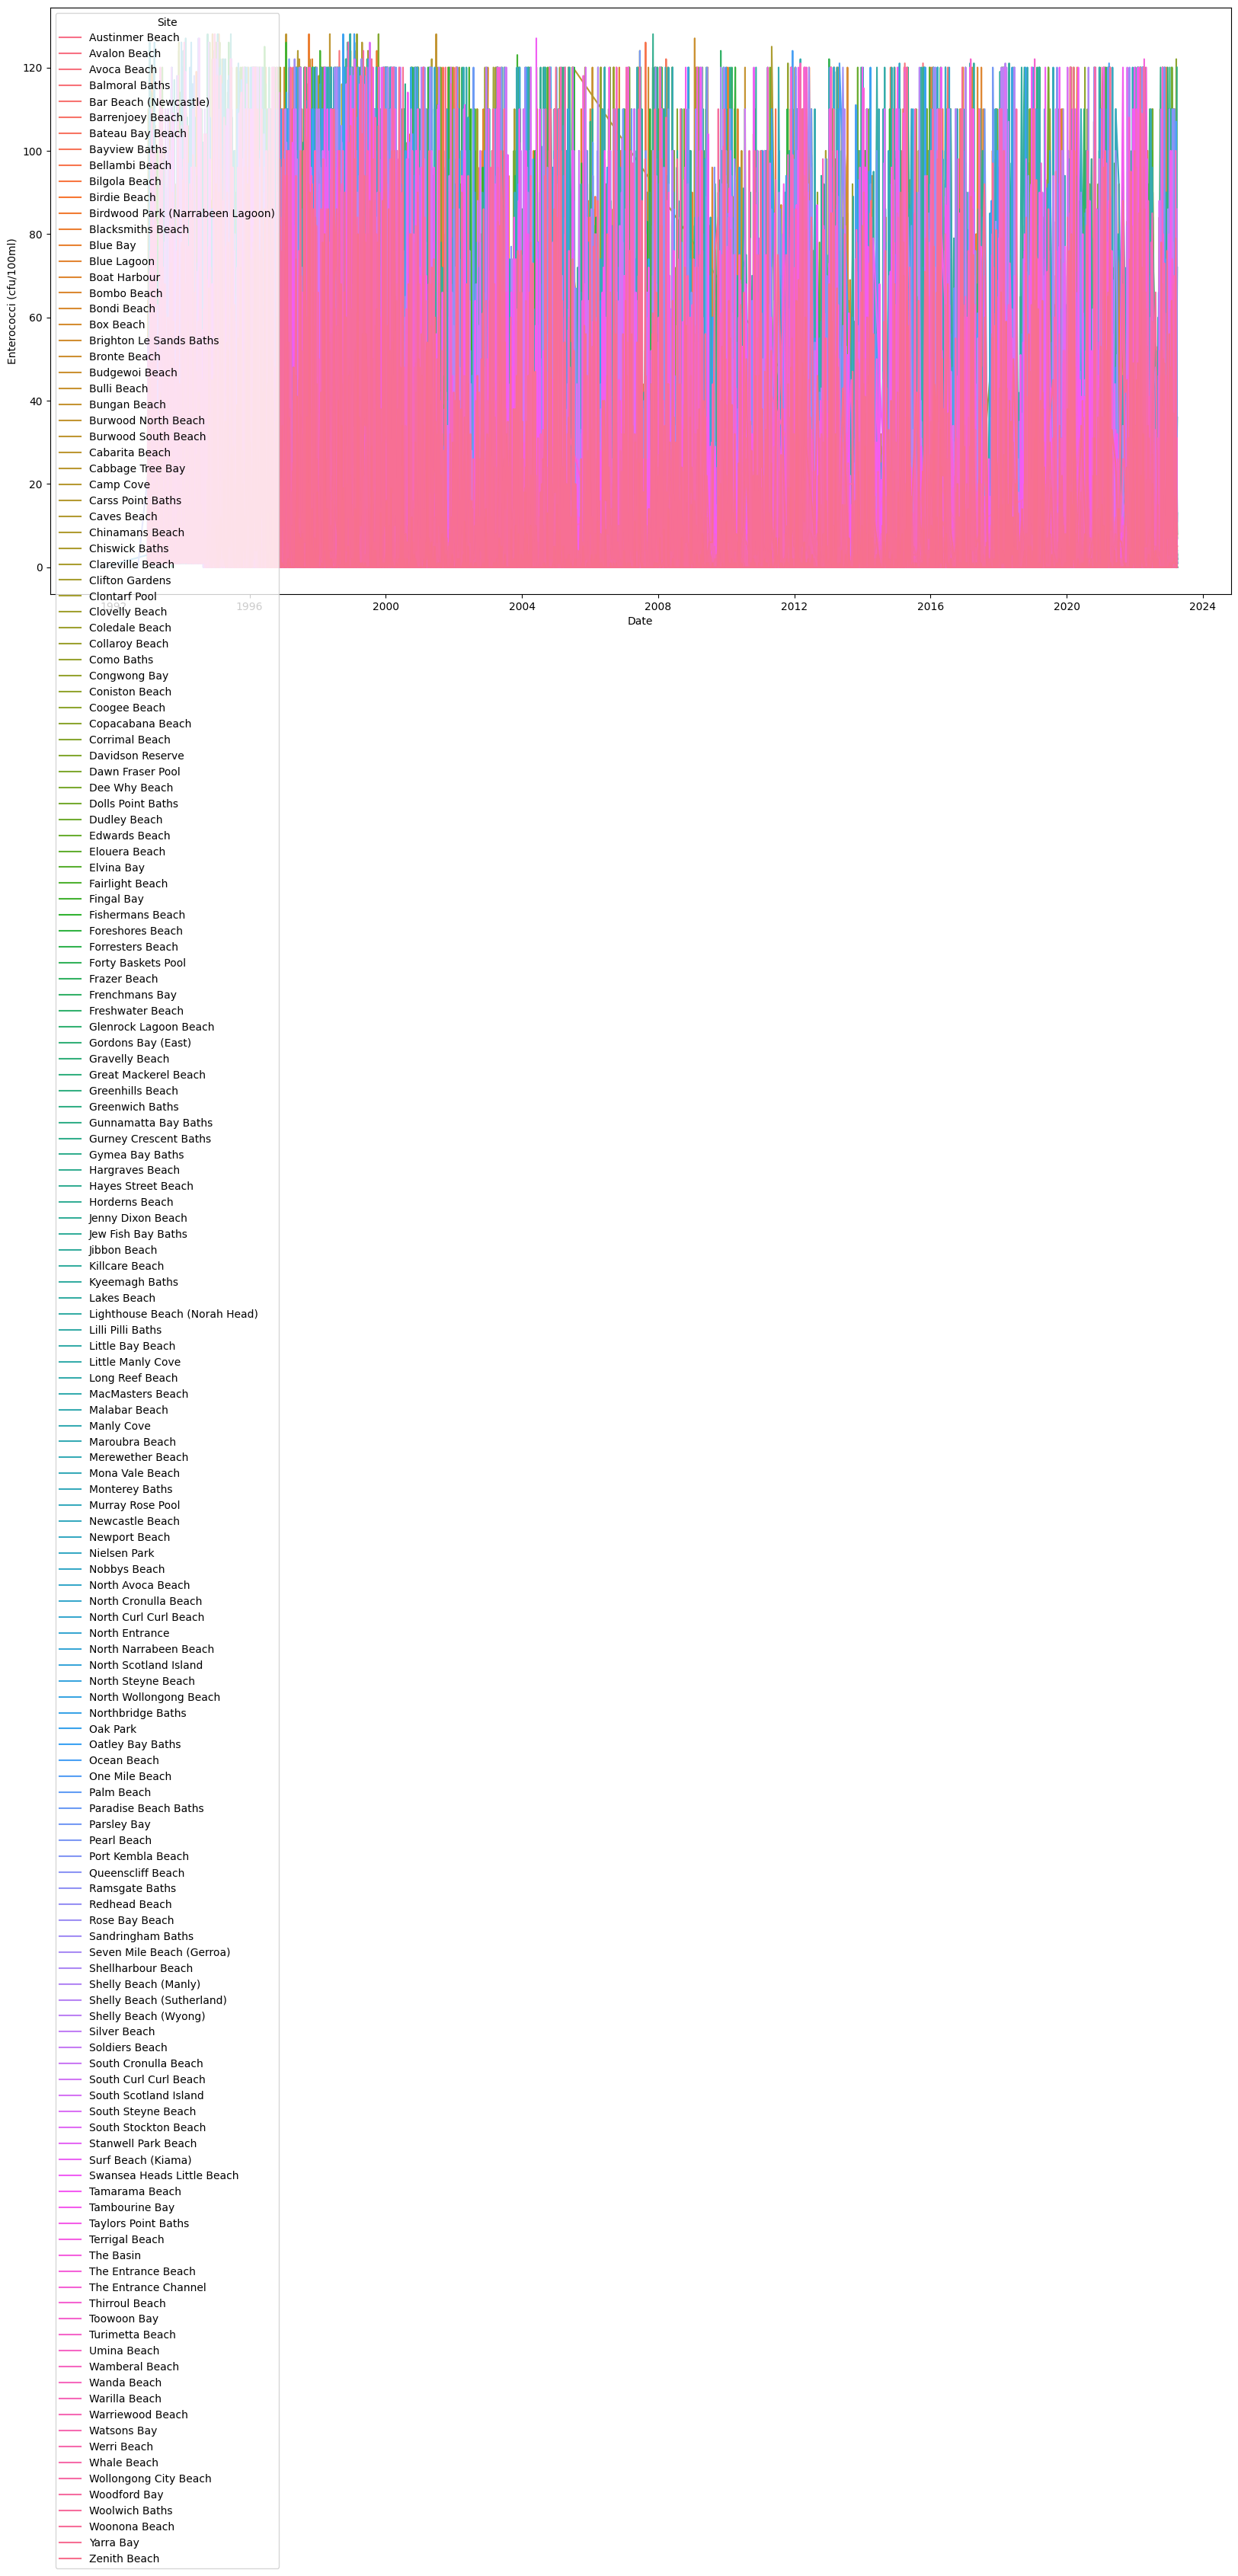

In [101]:

# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# set figure size
plt.figure(figsize=(20,10))

# remove outliers from the dataframe
merge_df_no_outliers = merge_df[merge_df['Enterococci (cfu/100ml)'] < merge_df['Enterococci (cfu/100ml)'].quantile(0.95)]

# group by Site and Date and calculate median Enterococci (cfu/100ml)
median_enterococci = merge_df_no_outliers.groupby(['Site','Date'])['Enterococci (cfu/100ml)'].max().reset_index()

# plot the data using seaborn lineplot
sns.lineplot(x='Date', y='Enterococci (cfu/100ml)', hue='Site', data=median_enterococci)
plt.show()


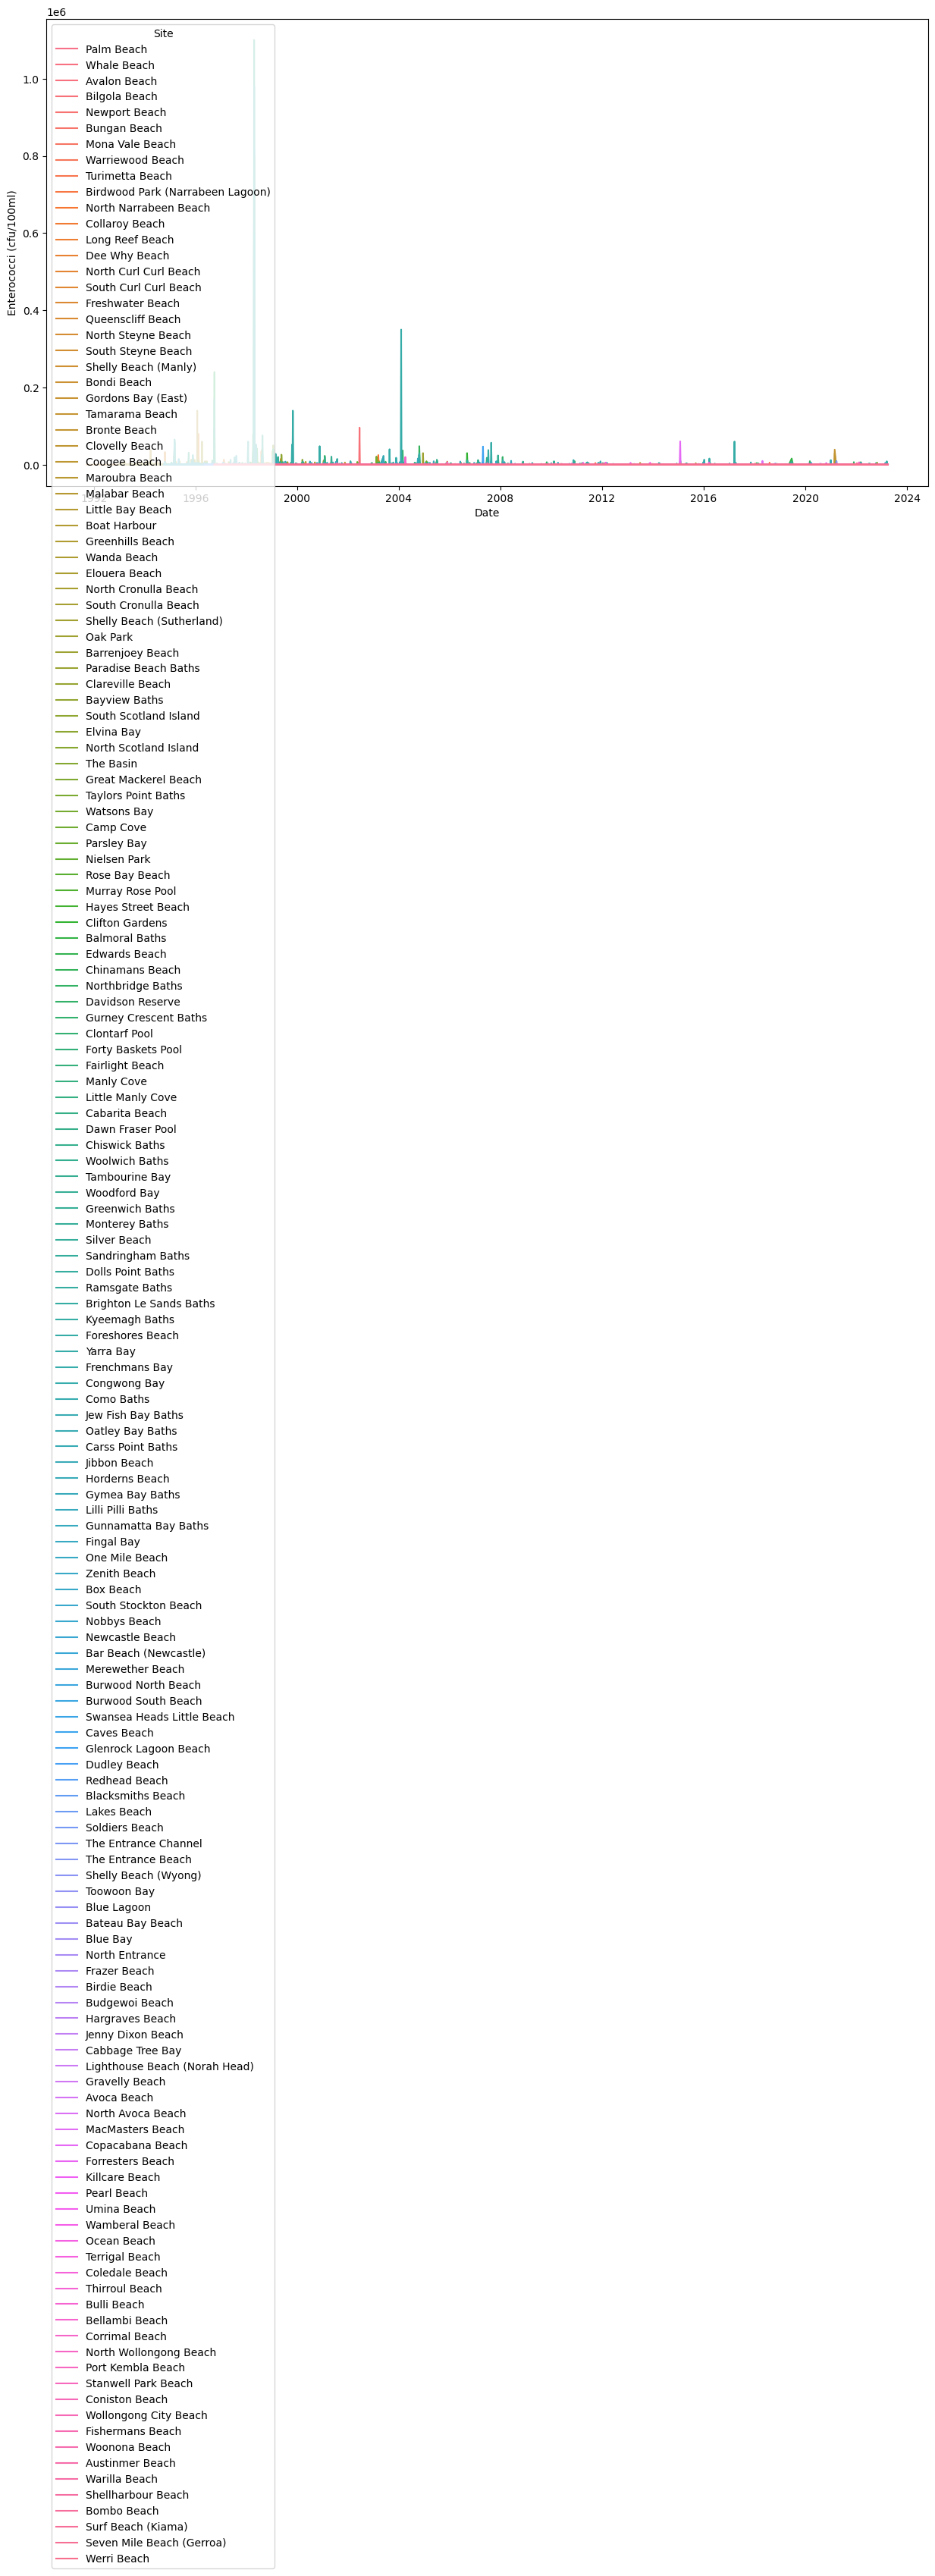

In [98]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.figure(figsize=(15,8))

# plot median Enterococci by Site over time
sns.lineplot(x="Date", y="Enterococci (cfu/100ml)", hue="Site", data=merge_df, estimator="median")

# show plot
plt.show()


In [112]:
merge_df.sketch.howto("Show the overall trend of Enterococci through time with a scatter plot with log y axis")

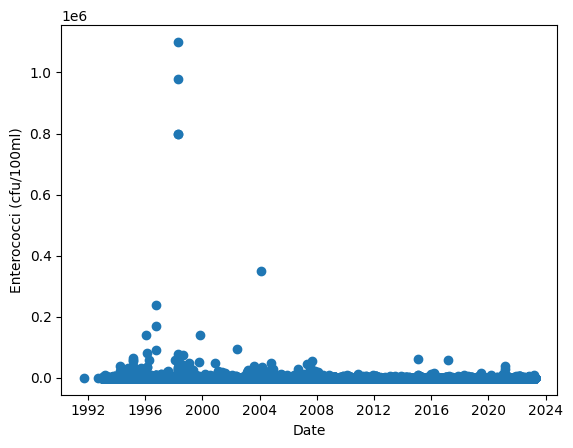

In [120]:

import matplotlib.pyplot as plt

# Create a scatter plot of Enterococci over time
plt.scatter(merge_df['Date'], merge_df['Enterococci (cfu/100ml)'])
#plt.semilogy(merge_df['Date'], merge_df['Enterococci (cfu/100ml)'])


# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Enterococci (cfu/100ml)')
#yscale("log")


# Show the plot
plt.show()


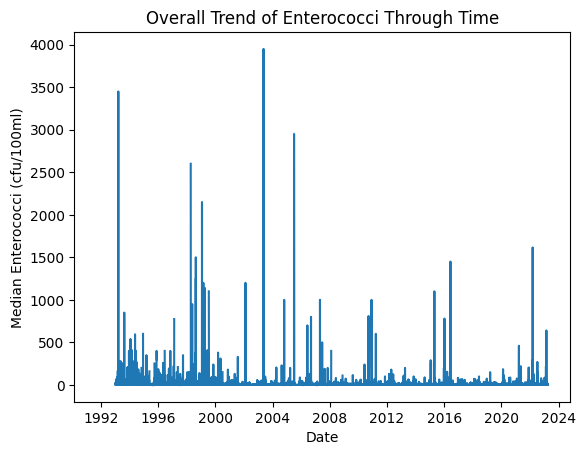

In [106]:

# Plot the overall trend of Enterococci through time
import matplotlib.pyplot as plt

# Group the data by date and calculate the mean Enterococci value for each date
enterococci_by_date = merge_df.groupby('Date')['Enterococci (cfu/100ml)'].median()

# Plot the mean Enterococci values over time
plt.plot(enterococci_by_date)
plt.xlabel('Date')
plt.ylabel('Median Enterococci (cfu/100ml)')
plt.title('Overall Trend of Enterococci Through Time')
plt.show()


In [46]:

# Rank and plot the sites by the amount of Enterococci through time

# Group data by Site and Date
df_grouped = df.groupby(['Site', 'Date'])['Enterococci (cfu/100ml)'].mean().reset_index().fillna(0)

In [47]:
df_grouped

Site       Date  Enterococci (cfu/100ml)
0       Airforce Beach 2006-10-24                      2.0
1       Airforce Beach 2006-10-31                      0.0
2       Airforce Beach 2006-11-07                      2.0
3       Airforce Beach 2006-11-14                      0.0
4       Airforce Beach 2006-11-21                      0.0
...                ...        ...                      ...
300512    Zenith Beach 2023-02-24                      2.0
300513    Zenith Beach 2023-03-02                      1.0
300514    Zenith Beach 2023-03-08                      1.0
300515    Zenith Beach 2023-03-14                      1.0
300516    Zenith Beach 2023-03-26                      0.0

[300517 rows x 3 columns]

In [48]:

# Create a pivot table to rank sites by Enterococci
df_pivot = df_grouped.pivot(index='Site', columns='Date', values='Enterococci (cfu/100ml)')


In [49]:
df_pivot.fillna(0, inplace=True)

In [50]:
df_pivot.mean(axis=1)

Site
Airforce Beach                       0.841046
Arcadia Vale                         0.479229
Arthur Keoughs Reserve               0.561020
Aslings Beach                        0.116444
Austinmer Beach                      0.468037
                                      ...    
Wyong River                         24.154864
Yarra Bay                           56.394102
Yattalunga Baths                    13.613216
Yosemite Creek - Minnehaha Falls     1.251399
Zenith Beach                         0.534438
Length: 342, dtype: float64

In [51]:
df_pivot


Date                              1989-01-03  1989-01-05  1989-01-09   
Site                                                                   
Airforce Beach                           0.0         0.0         0.0  \
Arcadia Vale                             0.0         0.0         0.0   
Arthur Keoughs Reserve                   0.0         0.0         0.0   
Aslings Beach                            0.0         0.0         0.0   
Austinmer Beach                          0.0         0.0         0.0   
...                                      ...         ...         ...   
Wyong River                              0.0         0.0         0.0   
Yarra Bay                                0.0         0.0         0.0   
Yattalunga Baths                         0.0         0.0         0.0   
Yosemite Creek - Minnehaha Falls         0.0         0.0         0.0   
Zenith Beach                             0.0         0.0         0.0   

Date                              1989-01-12  1989-01-16  1989-01-17   
Site                                                                   
Airforce Beach                           0.0         0.0         0.0  \
Arcadia Vale                             0.0         0.0         0.0   
Arthur Keoughs Reserve                   0.0         0.0         0.0   
Aslings Beach                            0.0         0.0         0.0   
Austinmer Beach                          0.0         0.0         0.0   
...                                      ...         ...         ...   
Wyong River                              0.0         0.0         0.0   
Yarra Bay                                0.0         0.0         0.0   
Yattalunga Baths                         0.0         0.0         0.0   
Yosemite Creek - Minnehaha Falls         0.0         0.0         0.0   
Zenith Beach                             0.0         0.0         0.0   

Date                              1989-01-19  1989-01-23  1989-01-25   
Site                                                                   
Airforce Beach                           0.0         0.0         0.0  \
Arcadia Vale                             0.0         0.0         0.0   
Arthur Keoughs Reserve                   0.0         0.0         0.0   
Aslings Beach                            0.0         0.0         0.0   
Austinmer Beach                          0.0         0.0         0.0   
...                                      ...         ...         ...   
Wyong River                              0.0         0.0         0.0   
Yarra Bay                                0.0         0.0         0.0   
Yattalunga Baths                         0.0         0.0         0.0   
Yosemite Creek - Minnehaha Falls         0.0         0.0         0.0   
Zenith Beach                             0.0         0.0         0.0   

Date                              1989-01-30  ...  2023-03-21  2023-03-22   
Site                                          ...                           
Airforce Beach                           0.0  ...        33.0         0.0  \
Arcadia Vale                             0.0  ...         0.0         0.0   
Arthur Keoughs Reserve                   0.0  ...         0.0         0.0   
Aslings Beach                            0.0  ...         0.0         0.0   
Austinmer Beach                          0.0  ...         0.0         0.0   
...                                      ...  ...         ...         ...   
Wyong River                              0.0  ...         0.0         0.0   
Yarra Bay                                0.0  ...         4.0         0.0   
Yattalunga Baths                         0.0  ...        10.0         0.0   
Yosemite Creek - Minnehaha Falls         0.0  ...         0.0         0.0   
Zenith Beach                             0.0  ...         0.0         0.0   

Date                              2023-03-23  2023-03-26  2023-03-27   
Site                                                                   
Airforce Beach                           0.

In [54]:
########

# TODO: Need to drop beaches not in the 160

In [53]:
df_pivot.plot()

<Axes: xlabel='Site'>

ValueError: Image size of 547x194682 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [52]:

# Sort the pivot table by highest average Enterococci
df_sorted = df_pivot.sort_values(by=df_pivot.mean(axis=1), ascending=False)


KeyError: Site
Airforce Beach                       0.841046
Arcadia Vale                         0.479229
Arthur Keoughs Reserve               0.561020
Aslings Beach                        0.116444
Austinmer Beach                      0.468037
                                      ...    
Wyong River                         24.154864
Yarra Bay                           56.394102
Yattalunga Baths                    13.613216
Yosemite Creek - Minnehaha Falls     1.251399
Zenith Beach                         0.534438
Length: 342, dtype: float64